In [5]:
import scipy.io.wavfile as wavread
import os
files = os.listdir(".")

In [2]:
files

['Audiospur.wav',
 'Audiospur-4.wav',
 'analyse_muffeling.ipynb',
 'Audiospur-2.wav',
 'Audiospur-3.wav']

In [6]:
wavread.read('Audiospur.wav')

/tmp/ipykernel_11584/1503284194.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  wavread.read('Audiospur.wav')


(44100, array([2923, 4288, 3105, ..., -468, -392,  -91], dtype=int16))

In [7]:
tracks = []
for file in ['Audiospur.wav', 'Audiospur-2.wav', 'Audiospur-4.wav', 'Audiospur-3.wav']:
    sr, track = wavread.read(file)
    tracks.append(track)

/tmp/ipykernel_11584/717751105.py:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sr, track = wavread.read(file)


In [23]:
tracks_normalized = []
for track in tracks:
    tracks_normalized.append(track/max(np.max(track), -np.min(track)))

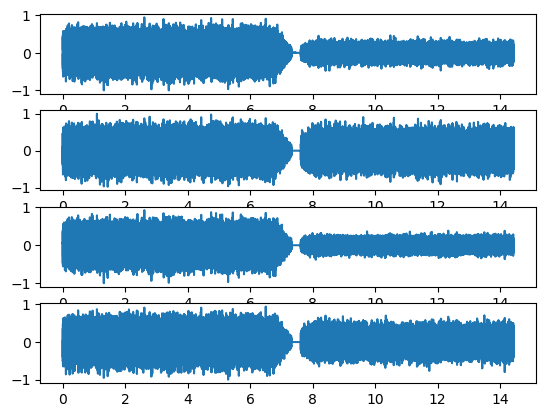

In [27]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(4,1)
n = len(tracks[0])
for i in range(4):
    axs[i].plot(np.arange(n)/sr, tracks_normalized[i])


In [25]:
import numpy as np
energies_loud = []
energies_muffeld = []
compute_energy = lambda sig: np.mean(sig**2)
for track in tracks_normalized:
    energies_loud.append(compute_energy(track[100_000:200_000]))
    energies_muffeld.append(compute_energy(track[400_000:500_000]))

In [26]:
for i in range(4):
    print(f"Energy of track {i+1} reduced by {energies_muffeld[i]/energies_loud[i]:.1%}")

Energy of track 1 reduced by 23.5%
Energy of track 2 reduced by 84.7%
Energy of track 3 reduced by 16.3%
Energy of track 4 reduced by 59.2%
